<a href="https://colab.research.google.com/github/AyonChatterjee/ML-Projects-/blob/main/OlympicsPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
teams = pd.read_csv("teams.csv")

teams.head()

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [10]:
teams  = teams[["team" , "country" , "year" , "athletes" , "age" , "prev_medals" , "medals"]]

teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


In [11]:
import pandas as pd

# Assuming 'teams.csv' contains your data
teams = pd.read_csv("teams.csv")
teams = teams[["team", "country", "year", "athletes", "age", "prev_medals", "medals"]]

# Identify columns with numeric data intended for correlation
numeric_columns = ["year", "athletes", "age", "prev_medals", "medals"]

# Convert numeric columns to appropriate data type
for col in numeric_columns:
    try:
        teams[col] = pd.to_numeric(teams[col], errors='coerce')
        # 'coerce' will replace non-convertible values with NaN
    except ValueError as e:
        print(f"Error converting column {col}: {e}")

# Calculate correlations on numeric columns
correlations = teams[numeric_columns].corr()["medals"]
print(correlations)

year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64


In [12]:
teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2144 entries, 0 to 2143
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   team         2144 non-null   object 
 1   country      2144 non-null   object 
 2   year         2144 non-null   int64  
 3   athletes     2144 non-null   int64  
 4   age          2144 non-null   float64
 5   prev_medals  2014 non-null   float64
 6   medals       2144 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 117.4+ KB



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


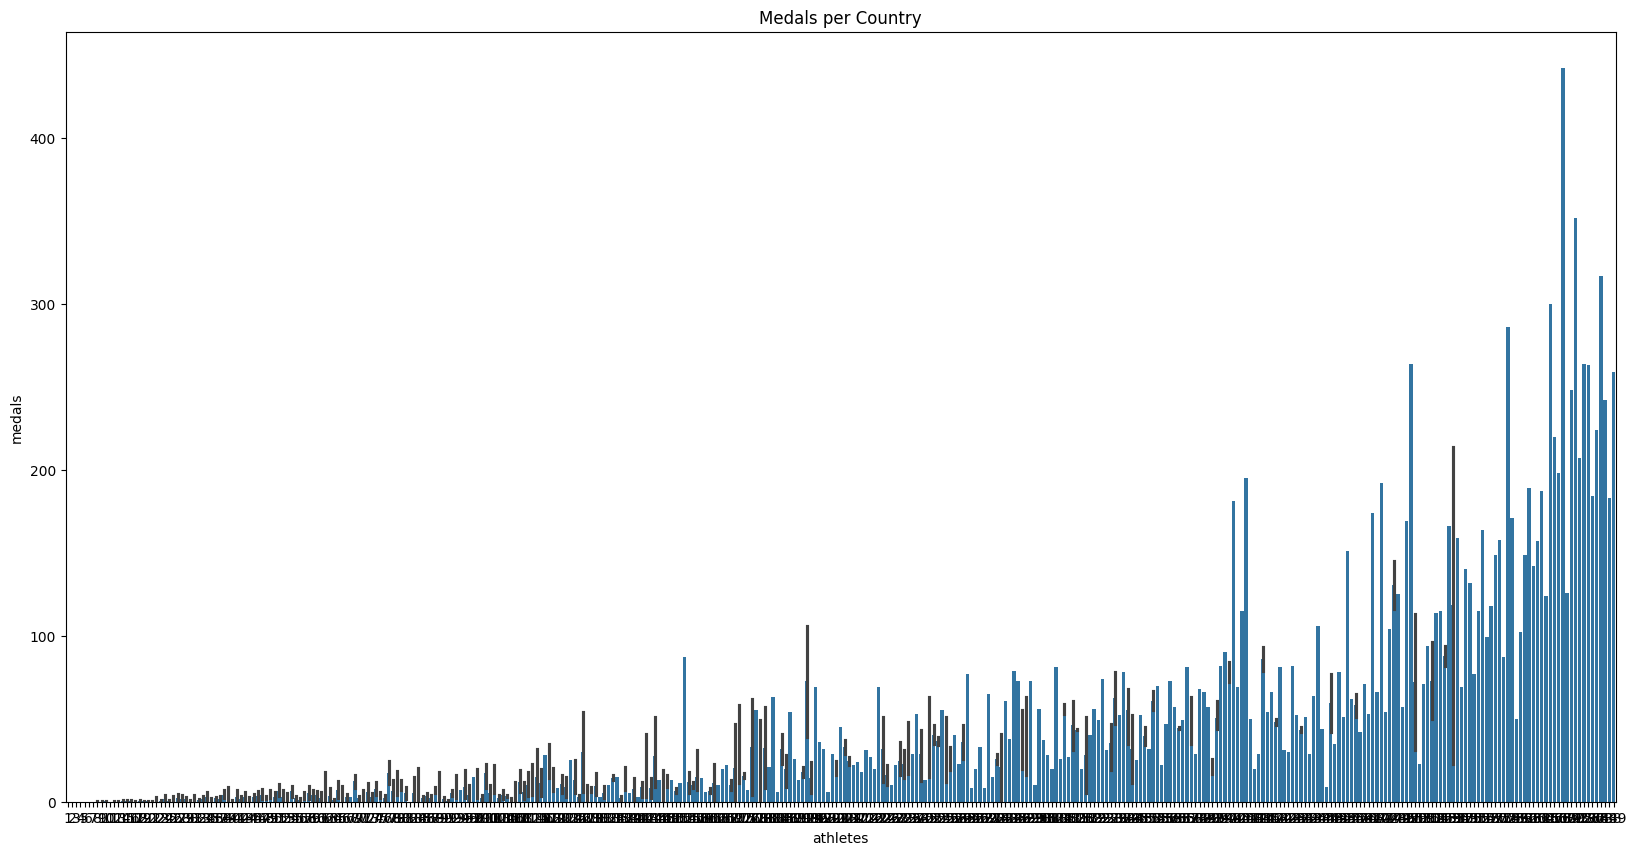

In [13]:
! pip install matplotlib 
! pip install seaborn 

import matplotlib.pyplot  as plt
import seaborn as sns

plt.figure(figsize=(20 , 10))

plt.title("Medals per Country")
sns.barplot(x="athletes", y="medals", data=teams)

plt.show()


<Axes: ylabel='Frequency'>

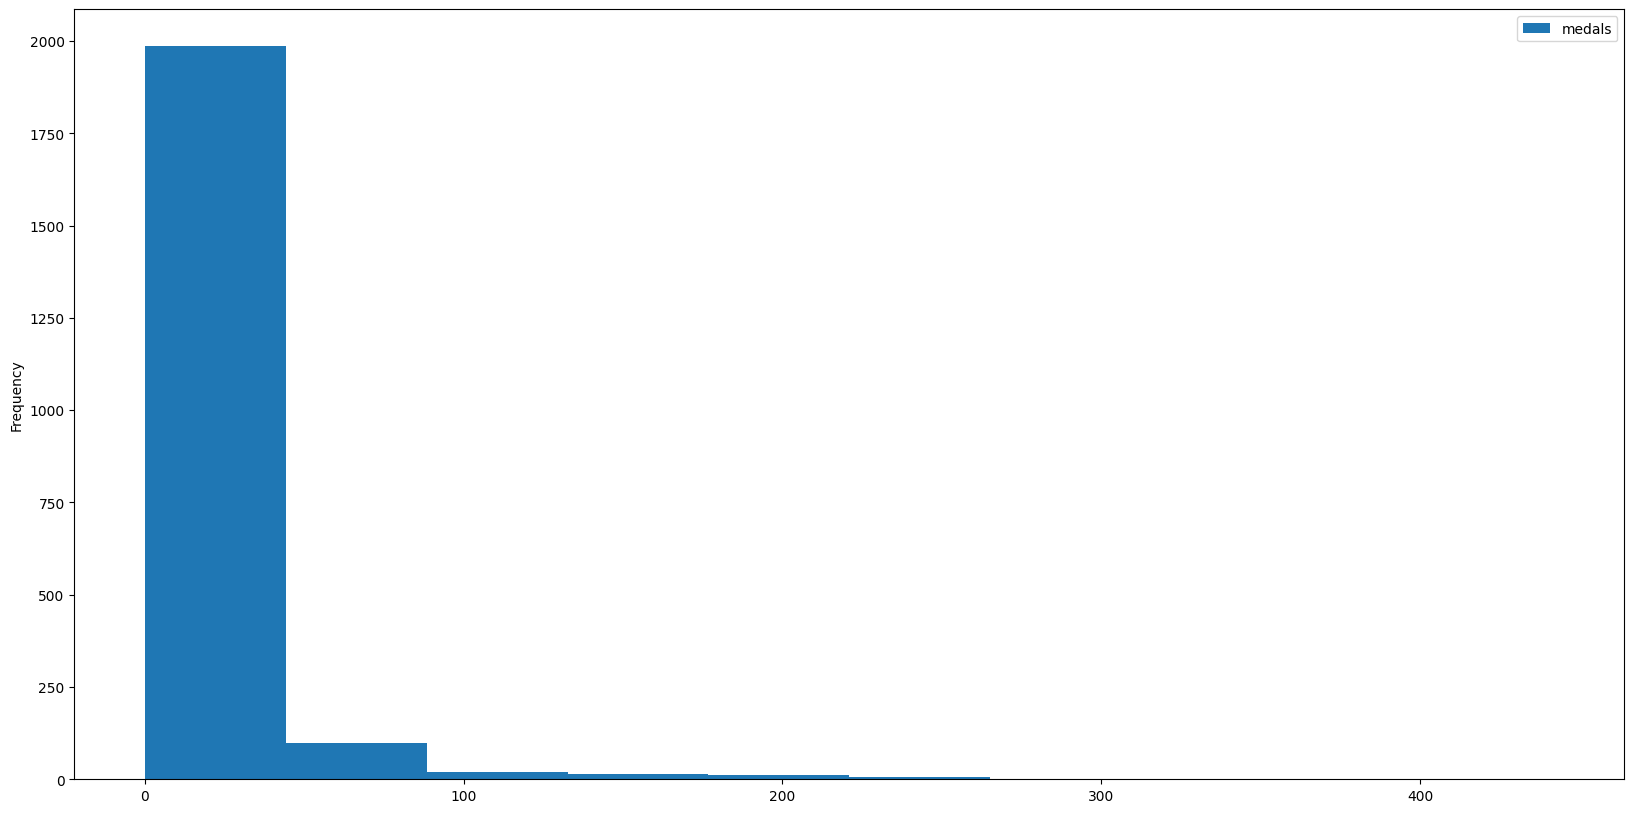

In [14]:
teams.plot.hist(y ="medals" , figsize = (20 , 10))

DATA CLEANING


In [15]:
teams[teams.isnull().any(axis = 1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


In [16]:
teams = teams.dropna()

teams.head()

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0


Data Training and Testing

In [17]:
train  = teams[teams["year"] < 2012].copy()
test = teams[teams["year"] >= 2012].copy()

train.shape


(1609, 7)

In [18]:
test.shape

(405, 7)

In [19]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

predictors = ["athletes" , "age"]
target = "medals"

reg.fit(train[predictors] , train[target])

LinearRegression()

In [20]:
predictions = reg.predict(test[predictors])

test["predictions"] = predictions


test.head()

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-4.657091
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-5.314816
24,ALB,Albania,2012,10,25.7,0.0,0,-3.761538
25,ALB,Albania,2016,6,23.7,0.0,0,-4.683755
37,ALG,Algeria,2012,39,24.8,2.0,1,2.551229


In [21]:
test.loc[test["predictions"] < 0 , "predictions"] = 0
test["predictions"] = test["predictions"].round()

test.head()

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,3.0


In [22]:
from sklearn.metrics import mean_absolute_error

error = mean_absolute_error(test["medals"] , test["predictions"])

error

4.654320987654321

In [23]:
teams.describe()["medals"]

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

In [24]:
test[test["team"] == "USA"]

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,145.0
2054,USA,United States,2016,719,26.4,248.0,264,151.0


In [25]:
test[test["team"] == "IND"]

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,15.0
908,IND,India,2016,130,26.1,6.0,2,22.0


In [26]:
errors = (test["medals"] - test["predictions"]).abs()

errors

6       1.0
7       0.0
24      0.0
25      0.0
37      2.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    0.0
2143    1.0
Length: 405, dtype: float64

In [27]:
error_by_team = errors.groupby(test["team"]).mean()

error_by_team.head()

team
AFG    0.5
ALB    0.0
ALG    5.0
AND    0.0
ANG    1.0
dtype: float64

In [28]:
medals_by_team = test["medals"].groupby(test["team"]).mean()

medals_by_team.head()

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
Name: medals, dtype: float64

In [29]:
medals_by_team = teams.groupby("team")["medals"].sum()

error_ratio = error_by_team / medals_by_team
print(error_ratio)

team
AFG    0.250000
AHO         NaN
ALB         NaN
ALG    0.294118
AND         NaN
         ...   
YAR         NaN
YEM         NaN
YUG         NaN
ZAM    0.000000
ZIM    0.022727
Length: 214, dtype: float64


In [30]:
error_ratio[~pd.isnull(error_ratio)]



team
AFG    0.250000
ALG    0.294118
ANG         inf
ARG    0.075000
ARM    0.178571
         ...   
UZB    0.064516
VEN    1.000000
VIE    0.250000
ZAM    0.000000
ZIM    0.022727
Length: 131, dtype: float64

In [31]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]
error_ratio

team
AFG    0.250000
ALG    0.294118
ARG    0.075000
ARM    0.178571
AUS    0.014838
         ...   
UZB    0.064516
VEN    1.000000
VIE    0.250000
ZAM    0.000000
ZIM    0.022727
Length: 130, dtype: float64